In [161]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify as sq
from matplotlib.ticker import PercentFormatter

from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [162]:
df = pd.read_csv(r"C:/Users/dimit/OneDrive/Desktop/git_projects/git-projects/Pakistan Largest Ecommerce Dataset.csv.zip")

# Pre-process and Data cleaning

In [163]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,7.000000,2016-7,7-2016,FY17,1.000000,NaN,NaN,NaN,NaN,NaN
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,7.000000,2016-7,7-2016,FY17,2.000000,NaN,NaN,NaN,NaN,NaN
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,7.000000,2016-7,7-2016,FY17,3.000000,NaN,NaN,NaN,NaN,NaN
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,60.000000,100147446,Beauty & Grooming,R-FSD-52352,...,7.000000,2016-7,7-2016,FY17,4.000000,NaN,NaN,NaN,NaN,NaN
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,7.000000,2016-7,7-2016,FY17,5.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df=df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)

In [165]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,60.000000,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [167]:
df.isnull().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601229
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

In [168]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [169]:
df=df.dropna(subset=['item_id'])

In [170]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,60.000000,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.000000,cod,8/28/2018,WOFSCE5AE00357AECDE,699.000000,1.000000,849.000000,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.000000,8.000000,2018-8,8-2018,FY19,115320.000000
584520,905205.000000,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.000000,1.000000,35899.000000,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.000000,8.000000,2018-8,8-2018,FY19,115326.000000
584521,905206.000000,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.000000,2.000000,652178.000000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000
584522,905207.000000,processing,8/28/2018,MATSAM5B1509B4696EA,87300.000000,2.000000,652178.000000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000


In [171]:
df['status']=df['status'].replace(to_replace=['order_refunded', 'refund'], value='refunded')
df['status']=df['status'].replace(to_replace=['received', 'paid'], value='complete')
df['status']=df['status'].replace(to_replace=['pending_paypal', 'holded', 'processing'], value='pending')

In [172]:
df['status'].unique()

array(['complete', 'canceled', 'refunded', 'closed', 'fraud', 'pending',
       'exchange', '\\N', 'cod', nan, 'payment_review'], dtype=object)

In [173]:
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-null  o

In [175]:
df.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137178
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [176]:
df['item_id']=df['item_id'].astype(str)

In [177]:
type(df['item_id'][0])

str

In [178]:
df['created_at']=pd.to_datetime(df['created_at'])

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447346 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  object   

In [180]:
# df['order_date']=df['created_at'].rename('order_date')
df=df.rename(columns={"created_at": "order_date"})

# Top 5 selling category

In [187]:
best_selling_category=df[df['status']=='complete'].groupby(['category_name_1']).agg({'grand_total': 'sum','Customer ID': 'nunique'}).round(2).sort_values('grand_total', ascending=False).reset_index()#.plot.bar()
best_selling_category.head(10)

,category_name_1,grand_total,Customer ID
0,Mobiles & Tablets,611781681.660000,22066
1,Appliances,234089912.260000,12043
2,Entertainment,192356542.470000,5464
3,Women's Fashion,141830520.260000,12708
4,Men's Fashion,86728471.020000,22061
5,Superstore,60290602.990000,5088
6,Others,58702104.820000,6056
7,Beauty & Grooming,48843698.420000,9799
8,Computing,48572065.500000,4687
9,Home & Living,40469543.200000,7415


In [182]:
pd.set_option('float_format', '{:f}'.format)

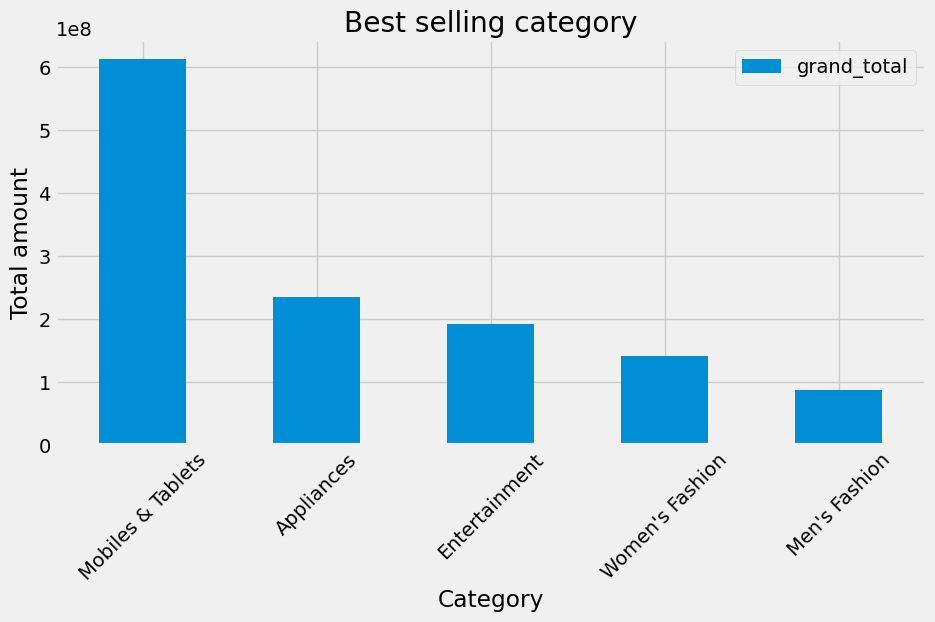

In [183]:
best_selling_category.head(5).plot.bar(x='category_name_1', y='grand_total')
plt.title('Best selling category')
plt.xlabel('Category')
plt.ylabel('Total amount')
plt.xticks(rotation=45)
plt.show()

# Average basket per category

In [190]:
best_selling_category['average_basket']=best_selling_category['grand_total']/best_selling_category['Customer ID']
average_basket_per_category=best_selling_category.sort_values('average_basket', ascending=False)
average_basket_per_category

,category_name_1,grand_total,Customer ID,average_basket
2,Entertainment,192356542.470000,5464,35204.345254
0,Mobiles & Tablets,611781681.660000,22066,27725.083008
1,Appliances,234089912.260000,12043,19437.840427
5,Superstore,60290602.990000,5088,11849.568198
3,Women's Fashion,141830520.260000,12708,11160.727121
8,Computing,48572065.500000,4687,10363.146042
6,Others,58702104.820000,6056,9693.214138
13,\N,18694108.180000,2063,9061.613272
9,Home & Living,40469543.200000,7415,5457.794093
7,Beauty & Grooming,48843698.420000,9799,4984.559488


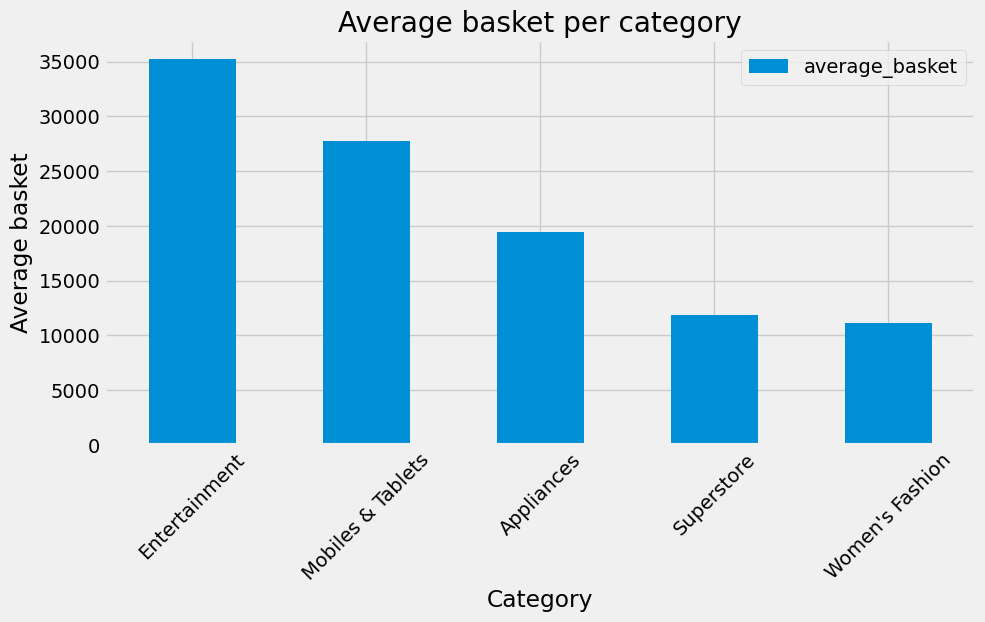

In [188]:
average_basket_per_category.head(5).plot.bar(x='category_name_1', y='average_basket')
plt.title('Average basket per category')
plt.xlabel('Category')
plt.ylabel('Average basket')
plt.xticks(rotation=45)
plt.show()


# Category entertainment is opportunity to expand, try to attract more people to this category
# Men's Fashion is crowded but with low average basket

Insights
# Category entertainment is opportunity to expand, try to attract more people to this category
# Men's Fashion is crowded but with low average basket